In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os

In [2]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [3]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()

In [4]:
#Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

In [5]:
#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

In [6]:
print(data.shape, labels.shape)
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

(39209, 30, 30, 3) (39209,)


In [8]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [9]:
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)


In [10]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [11]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [12]:
epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))
model.save("my_model.h5")


Epoch 1/15
981/981 [==============================] - 78s 78ms/step - loss: 3.6337 - accuracy: 0.0550 - val_loss: 3.4846 - val_accuracy: 0.0574
Epoch 2/15
981/981 [==============================] - 76s 77ms/step - loss: 3.4996 - accuracy: 0.0541 - val_loss: 3.4824 - val_accuracy: 0.0574
Epoch 3/15
981/981 [==============================] - 101s 103ms/step - loss: 3.4966 - accuracy: 0.0542 - val_loss: 3.4799 - val_accuracy: 0.0574
Epoch 4/15
981/981 [==============================] - 86s 88ms/step - loss: 3.4946 - accuracy: 0.0538 - val_loss: 3.4795 - val_accuracy: 0.0574
Epoch 5/15
981/981 [==============================] - 90s 92ms/step - loss: 3.4941 - accuracy: 0.0547 - val_loss: 3.4790 - val_accuracy: 0.0632
Epoch 6/15
981/981 [==============================] - 106s 109ms/step - loss: 3.4932 - accuracy: 0.0546 - val_loss: 3.4790 - val_accuracy: 0.0574
Epoch 7/15
981/981 [==============================] - 85s 87ms/step - loss: 3.4925 - accuracy: 0.0557 - val_loss: 3.4803 - val_accur

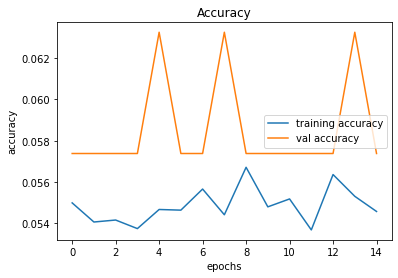

In [13]:
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

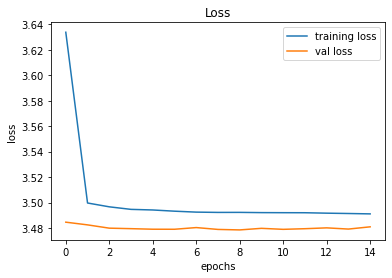

In [14]:
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [15]:
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score

In [16]:
y_test = pd.read_csv('Test.csv')

In [17]:
labels = y_test["ClassId"].values
imgs = y_test["Path"].values

In [18]:
data=[]


In [22]:
for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))


In [23]:
X_test=np.array(data)

In [33]:
pred = (model.predict(X_test) > 0.5).astype("int32")

1185/1185 [==============================] - 10s 9ms/step


In [39]:
model.save('traffic_classifier.h5')